In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors as clrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mplhep as hep
import numpy as np

In [2]:
def nonlinear(x):
    return 20*np.log10(x)

def cpu2gpu(cpu_hour):
    # ad-hoc choice obtained from NCSA proposal page
    # with 700k cpu hour limit vs. 25k gpu hour limit
    conversion_factor = 25/700
    return conversion_factor * cpu_hour

def gpu2cpu(gpu_hour):
    # ad-hoc choice obtained from NCSA proposal page
    # with 700k cpu hour limit vs. 25k gpu hour limit
    conversion_factor = 700/25
    return conversion_factor * gpu_hour

/tmp/ipykernel_97057/2770032487.py:14: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  hep.set_style("CMS")


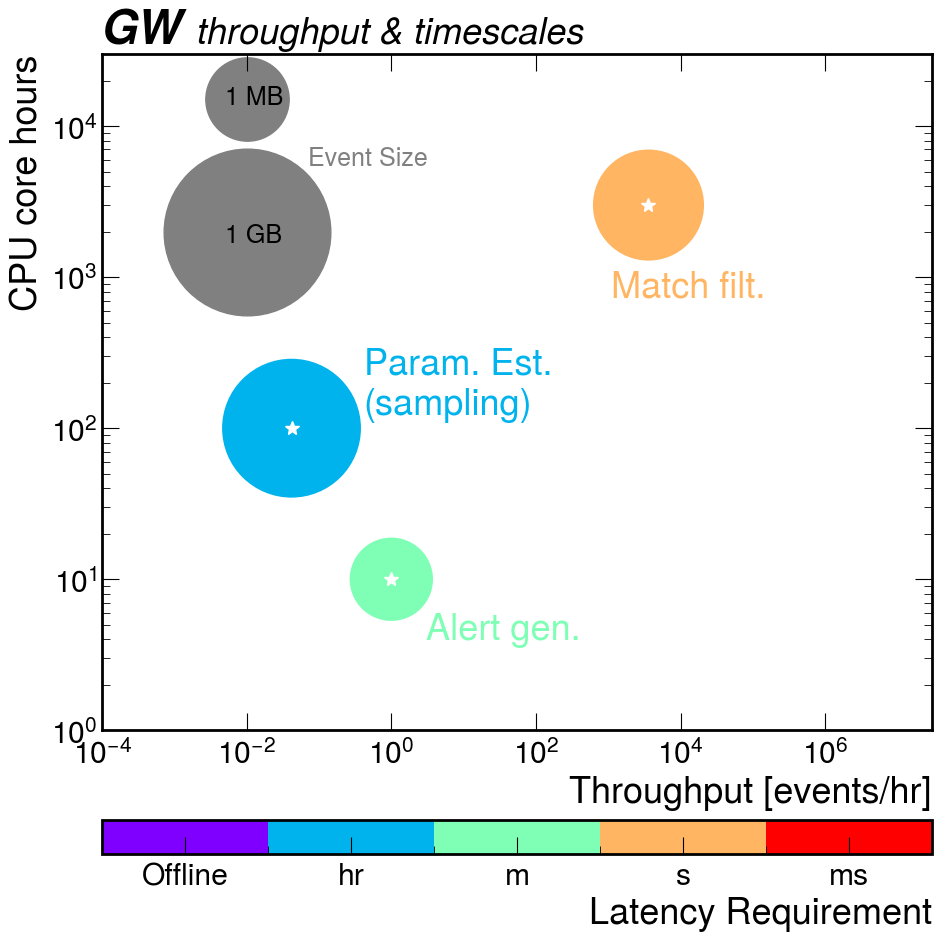

In [3]:
# cpu plot

labels = [
    'Match filt.',
    'Alert gen.',
    'Param. Est.\n(sampling)',
]
x = np.array([3600, 1, 1/(24),]) # events/hr
y = np.array([3000, 10, 100]) # Core-hours
w = np.array([10e3, 1e3, 100e3])  # should we do something like event size? in kB
z = np.array([1, 0, -1,])

plt.style.use([hep.style.ROOT, hep.style.firamath])
hep.set_style("CMS")

cmap = plt.cm.rainbow
norm = clrs.BoundaryNorm(np.arange(-2.5, 3, 1), cmap.N)
f, ax = plt.subplots()

for xi, yi, wi, l, zi in zip(x, y, w, labels, z):
    ax.scatter([xi], [yi], c=[zi], cmap=cmap, norm=norm, edgecolor='none', label=l, s=1.*nonlinear(wi)*nonlinear(wi))
    ax.plot([xi], [yi], label=l, marker='*', markersize=10, color='white')

    if 'Match' in l:
        ax.text(xi*0.3, yi*0.25, l, color=cmap(norm(zi)))
    elif 'DeepClean' in l:
        ax.text(xi*0.8, yi*0.25, l, color=cmap(norm(zi)))
    elif 'sampling' in l:
        ax.text(xi*10, yi*1.25, l, color=cmap(norm(zi)))
    else:
        ax.text(xi*3.0, yi*0.4, l, color=cmap(norm(zi)))

ax.scatter([1e-2], [1.5e4], label='1 MB', marker='o', s=1.*nonlinear(1000)*nonlinear(1000), color='gray')
ax.scatter([1e-2], [2e3], label='1 GB', marker='o', s=1.*nonlinear(1000000)*nonlinear(1000000), color='gray')
ax.text(0.5e-2, 1.41e4, '1 MB', color='black',size=18)
ax.text(0.5e-2, 1.7e3, '1 GB', color='black',size=18)
ax.text(0.7e-1, 5.5e3, 'Event Size', color='grey',size=18)

hep.label.exp_text(text=" throughput & timescales",exp="GW",italic=(True, True),loc=0,pad=0)

ymin = 1
ymax = 30000
xmin = 1e-4
xmax = 3e7

ax.loglog()
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel('Throughput [events/hr]')
ax.set_ylabel('CPU core hours')

divider = make_axes_locatable(ax)
cax = divider.new_vertical(size='5%', pad=0.9, pack_start = True)
f.add_axes(cax)

PCM = ax.get_children()[0]
cbar = plt.colorbar(PCM, ax=ax, ticks=np.linspace(-2, 2, 5), label='Latency Requirement', cax = cax, orientation = 'horizontal')
cbar.ax.set_xticklabels(['Offline','hr','m','s', 'ms'])

plt.tight_layout()
plt.savefig('gw-plot-cpu-v3.pdf')

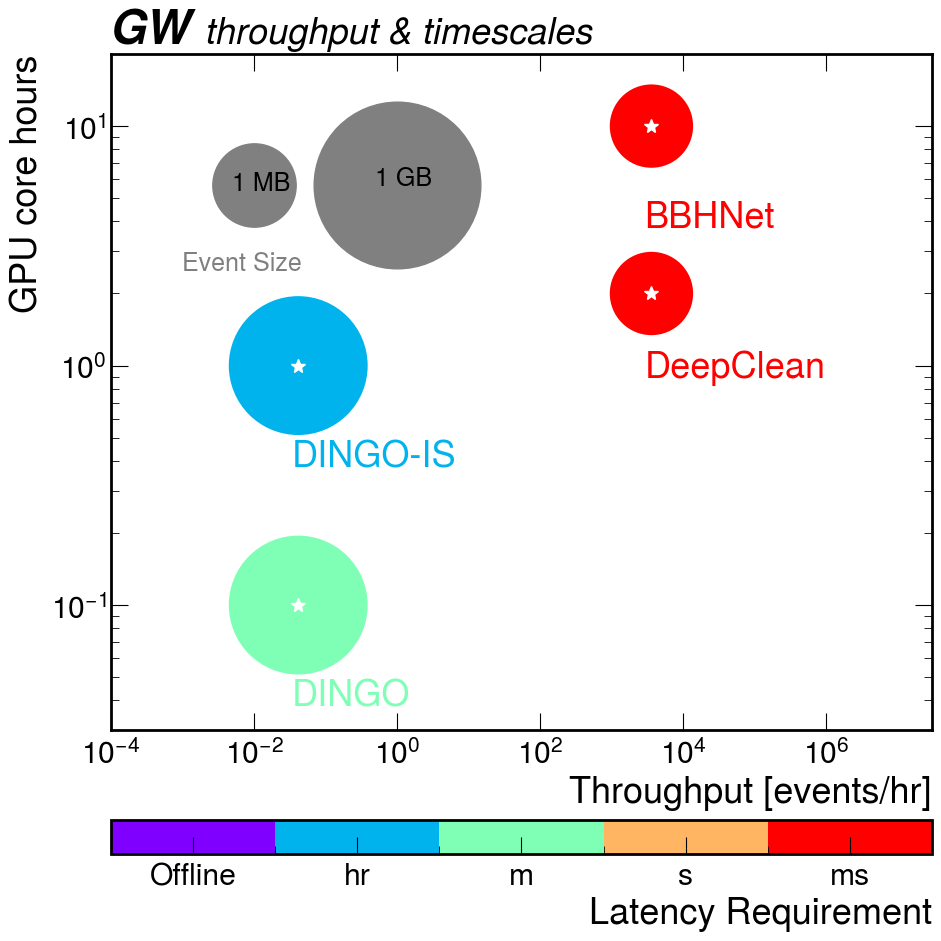

In [4]:
# gpu-plot

labels = [
    'DeepClean',
    'BBHNet',
    'DINGO',
    'DINGO-IS'
]
x = np.array([3600, 3600, 1/(24), 1/(24)]) # events/hr
y = np.array([2, 10, 0.1, 1]) # GPU Core-hours
w = np.array([1e3, 1e3, 100e3, 100e3])  # should we do something like event size? in kB
z = np.array([2, 2, 0, -1])


cmap = plt.cm.rainbow
norm = clrs.BoundaryNorm(np.arange(-2.5, 3, 1), cmap.N)
f, ax = plt.subplots()

for xi, yi, wi, l, zi in zip(x, y, w, labels, z):
    ax.scatter([xi], [yi], c=[zi], cmap=cmap, norm=norm, edgecolor='none', label=l, s=1.*nonlinear(wi)*nonlinear(wi))
    ax.plot([xi], [yi], label=l, marker='*', markersize=10, color='white')

    if 'Match' in l:
        ax.text(xi*0.3, yi*0.25, l, color=cmap(norm(zi)))
    elif 'DeepClean' in l:
        ax.text(xi*0.8, yi*0.45, l, color=cmap(norm(zi)))
    elif 'sampling' in l:
        ax.text(xi*2.5, yi*1.25, l, color=cmap(norm(zi)))
    else:
        ax.text(xi*0.8, yi*0.38, l, color=cmap(norm(zi)))

ax.scatter([1e-2], [5.7e0], label='1 MB', marker='o', s=1.*nonlinear(1000)*nonlinear(1000), color='gray')
ax.scatter([1e-0], [5.7e0], label='1 GB', marker='o', s=1.*nonlinear(1000000)*nonlinear(1000000), color='gray')
ax.text(0.5e-2, 5.41e0, '1 MB', color='black',size=18)
ax.text(0.5e-0, 5.7e0, '1 GB', color='black',size=18)
ax.text(1e-3, 2.5e0, 'Event Size', color='grey',size=18)

hep.label.exp_text(text=" throughput & timescales",exp="GW",italic=(True, True),loc=0,pad=0)

ymin = 3e-2
ymax = 2e1
xmin = 1e-4
xmax = 3e7

ax.loglog()
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel('Throughput [events/hr]')
ax.set_ylabel('GPU core hours')

divider = make_axes_locatable(ax)
cax = divider.new_vertical(size='5%', pad=0.9, pack_start = True)
f.add_axes(cax)

PCM = ax.get_children()[0]
cbar = plt.colorbar(PCM, ax=ax, ticks=np.linspace(-2, 2, 5), label='Latency Requirement', cax = cax, orientation = 'horizontal')
cbar.ax.set_xticklabels(['Offline','hr','m','s', 'ms'])

plt.tight_layout()
plt.savefig('gw-plot-gpu-v5.pdf')